In [83]:
import pandas as pd

In [84]:
import matplotlib.pyplot as plt

In [85]:
import seaborn as sns

In [86]:
%matplotlib inline

In [87]:
#give colab acces to read files from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
arrests_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYPD_Arrest_Data__Year_to_Date__20250420.csv')

In [89]:
arrests_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,298799078,01/02/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299008265,01/07/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086)
4,298969999,01/06/2025,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,5,73,25-44,M,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526)


##Describe the Data

In [90]:
arrests_df.shape

(71242, 19)

In [91]:
arrests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71242 entries, 0 to 71241
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                71242 non-null  int64  
 1   ARREST_DATE               71242 non-null  object 
 2   PD_CD                     71242 non-null  int64  
 3   PD_DESC                   71242 non-null  object 
 4   KY_CD                     71238 non-null  float64
 5   OFNS_DESC                 71242 non-null  object 
 6   LAW_CODE                  71242 non-null  object 
 7   LAW_CAT_CD                70881 non-null  object 
 8   ARREST_BORO               71242 non-null  object 
 9   ARREST_PRECINCT           71242 non-null  int64  
 10  JURISDICTION_CODE         71242 non-null  int64  
 11  AGE_GROUP                 71242 non-null  object 
 12  PERP_SEX                  71242 non-null  object 
 13  PERP_RACE                 71242 non-null  object 
 14  X_COOR

In [92]:
arrests_df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [93]:
arrests_df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,7.124200e+04,71242.000000,71238.000000,71242.000000,71242.000000,7.124200e+04,71242.000000,71242.000000,71242.000000
mean,3.011852e+08,457.727619,262.005334,63.274080,0.872547,1.002424e+06,206818.886191,40.613647,-73.701442
std,1.495442e+06,274.387400,148.788670,34.977293,6.447428,5.899169e+04,31785.157626,2.230782,4.046217
min,2.987043e+08,12.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.252488
25%,2.999070e+08,205.000000,117.000000,40.000000,0.000000,9.904290e+05,184554.500000,40.673189,-73.977394
50%,3.011167e+08,439.000000,341.000000,62.000000,0.000000,1.004928e+06,206536.000000,40.733497,-73.924883
75%,3.023205e+08,729.000000,344.000000,101.000000,0.000000,1.017426e+06,235883.000000,40.814105,-73.879171
max,3.040454e+08,969.000000,995.000000,123.000000,97.000000,1.067185e+06,271303.000000,40.911307,0.000000


In [94]:
arrests_df.isnull().sum()

,0
ARREST_KEY,0
ARREST_DATE,0
PD_CD,0
PD_DESC,0
KY_CD,4
OFNS_DESC,0
LAW_CODE,0
LAW_CAT_CD,361
ARREST_BORO,0
ARREST_PRECINCT,0


##Explore the Dataset

In [95]:
arrests_df.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,298799078,01/02/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.000000,0.000000,POINT (0 0)


In [96]:
#Arrests Grouped by race
arrests_df.groupby(["PERP_RACE"])["ARREST_KEY"].count().sort_values(ascending=False)

,ARREST_KEY
PERP_RACE,
BLACK,33971
WHITE HISPANIC,18373
WHITE,7265
BLACK HISPANIC,6985
ASIAN / PACIFIC ISLANDER,4132
UNKNOWN,267
AMERICAN INDIAN/ALASKAN NATIVE,249


In [97]:
#Arrests Grouped by Gender
arrests_df.groupby(["PERP_SEX"])["ARREST_KEY"].count()

,ARREST_KEY
PERP_SEX,
F,12540
M,58702


In [98]:
#Arrests Grouped by Age
arrests_df.groupby(["AGE_GROUP"])["ARREST_KEY"].count().sort_values(ascending=False)

,ARREST_KEY
AGE_GROUP,
25-44,41830
45-64,15070
18-24,10549
<18,2446
65+,1347


In [99]:
#Arrests Grouped by age and gender
arrests_df.groupby(["AGE_GROUP", "PERP_SEX"])["ARREST_KEY"].count().sort_values(ascending=False)

,,ARREST_KEY
AGE_GROUP,PERP_SEX,
25-44,M,34443
45-64,M,12671
18-24,M,8463
25-44,F,7387
45-64,F,2399
18-24,F,2086
<18,M,1986
65+,M,1139
<18,F,460


In [100]:
#Arrests Grouped by race and gender
arrests_df.groupby(["PERP_RACE", "PERP_SEX"])["ARREST_KEY"].count().sort_values(ascending=False)

,,ARREST_KEY
PERP_RACE,PERP_SEX,
BLACK,M,27922
WHITE HISPANIC,M,15241
BLACK,F,6049
BLACK HISPANIC,M,6019
WHITE,M,5645
ASIAN / PACIFIC ISLANDER,M,3454
WHITE HISPANIC,F,3132
WHITE,F,1620
BLACK HISPANIC,F,966


In [101]:
#Arrests Grouped by race and age
arrests_df.groupby(["PERP_RACE", "AGE_GROUP"])["ARREST_KEY"].count().sort_values(ascending=False)

PERP_RACE                       AGE_GROUP
BLACK                           25-44        19546
WHITE HISPANIC                  25-44        11022
BLACK                           45-64         7407
                                18-24         4947
BLACK HISPANIC                  25-44         4310
WHITE                           25-44         4186
WHITE HISPANIC                  45-64         3510
                                18-24         3036
ASIAN / PACIFIC ISLANDER        25-44         2463
WHITE                           45-64         2068
BLACK                           <18           1387
BLACK HISPANIC                  18-24         1224
                                45-64         1109
ASIAN / PACIFIC ISLANDER        45-64          883
BLACK                           65+            684
WHITE                           18-24          679
WHITE HISPANIC                  <18            567
ASIAN / PACIFIC ISLANDER        18-24          563
BLACK HISPANIC                  <18            269
WHITE HISPANIC                  65+            238
WHITE                           65+            219
UNKNOWN                         25-44          157
AMERICAN INDIAN/ALASKAN NATIVE  25-44          146
ASIAN / PACIFIC ISLANDER        65+            123
WHITE                           <18            113
ASIAN / PACIFIC ISLANDER        <18            100
BLACK HISPANIC                  65+             73
UNKNOWN                         18-24           54
                                45-64           48
AMERICAN INDIAN/ALASKAN NATIVE  18-24           46
                                45-64           45
                                65+              7
                                <18              5
UNKNOWN                         <18              5
                                65+              3
Name: ARREST_KEY, dtype: int64

In [102]:
#Arrests Grouped by boro
arrests_df.groupby(["ARREST_BORO"])["ARREST_KEY"].count().sort_values(ascending=False)

,ARREST_KEY
ARREST_BORO,
K,20064
M,17133
B,15837
Q,15193
S,3015


In [103]:
#Arrest Counts Grouped by Borough and Offense Description
arrests_df.groupby(["ARREST_BORO", "OFNS_DESC"])["ARREST_KEY"].count()

ARREST_BORO  OFNS_DESC                     
B            (null)                              2
             ADMINISTRATIVE CODE                10
             ALCOHOLIC BEVERAGE CONTROL LAW     15
             ANTICIPATORY OFFENSES              29
             ARSON                               6
                                              ... 
S            ROBBERY                            78
             SEX CRIMES                         69
             THEFT-FRAUD                         5
             UNAUTHORIZED USE OF A VEHICLE      12
             VEHICLE AND TRAFFIC LAWS          280
Name: ARREST_KEY, Length: 243, dtype: int64

In [104]:
#Arrest Counts by Offense Description (Descending Order)
arrests_df.groupby([ "OFNS_DESC"])["ARREST_KEY"].count().sort_values(ascending=False)

,ARREST_KEY
OFNS_DESC,
ASSAULT 3 & RELATED OFFENSES,9211
PETIT LARCENY,7468
DANGEROUS DRUGS,6167
FELONY ASSAULT,5294
MISCELLANEOUS PENAL LAW,4740
OTHER OFFENSES RELATED TO THEFT,4661
VEHICLE AND TRAFFIC LAWS,4586
CRIMINAL MISCHIEF & RELATED OF,3044
DANGEROUS WEAPONS,2649


##Data Cleaning

In [105]:
#converting non-standard missing values into standard-one
mising_values = ['(null)', 'UNKNOWN']
arrest_df_upd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYPD_Arrest_Data__Year_to_Date__20250420.csv', na_values =  mising_values)

In [106]:
arrest_df_upd.isnull().sum()

,0
ARREST_KEY,0
ARREST_DATE,0
PD_CD,0
PD_DESC,4
KY_CD,4
OFNS_DESC,4
LAW_CODE,0
LAW_CAT_CD,361
ARREST_BORO,0
ARREST_PRECINCT,0


In [107]:
arrest_df_upd.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,298799078,01/02/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.000000,0.000000,POINT (0 0)


In [114]:
#dropping the columns I'm not going to use for the visualization
arrest_df_dropped = arrest_df_upd.drop(columns =['PD_CD', 'KY_CD', 'PD_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_PRECINCT', 'New Georeferenced Column'], inplace=False)


In [115]:
arrest_df_dropped.head(3)

,ARREST_KEY,ARREST_DATE,OFNS_DESC,ARREST_BORO,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,298874520,01/04/2025,GRAND LARCENY,M,0,25-44,M,BLACK,0,0,0.000000,0.000000
1,298799078,01/02/2025,ASSAULT 3 & RELATED OFFENSES,M,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348
2,298921520,01/05/2025,MISCELLANEOUS PENAL LAW,K,0,45-64,M,WHITE,0,0,0.000000,0.000000


##Data Visualization

In [117]:
arrest_df_dropped.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'OFNS_DESC', 'ARREST_BORO',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')

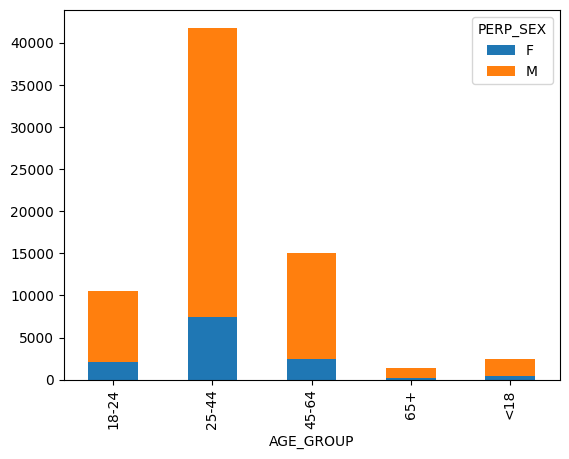

In [122]:
#Arrests Grouped by age and gender
arrest_age_sex = arrest_df_dropped.groupby(["AGE_GROUP", "PERP_SEX"])["ARREST_KEY"].count().unstack()
arrest_age_sex.plot(kind="bar", stacked=True);

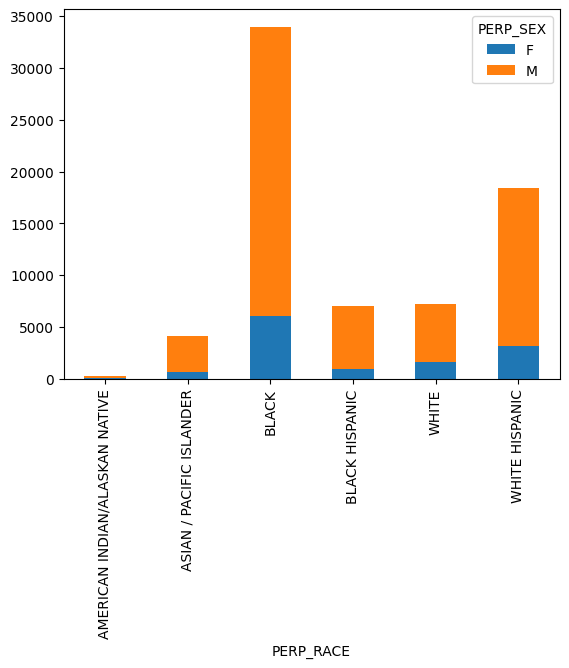

In [119]:
#Arrest Counts Grouped by race and gender
arrest_race_geder= arrest_df_dropped.groupby(["PERP_RACE", "PERP_SEX"])["ARREST_KEY"].count().unstack()
arrest_race_geder.plot(kind="bar", stacked=True);

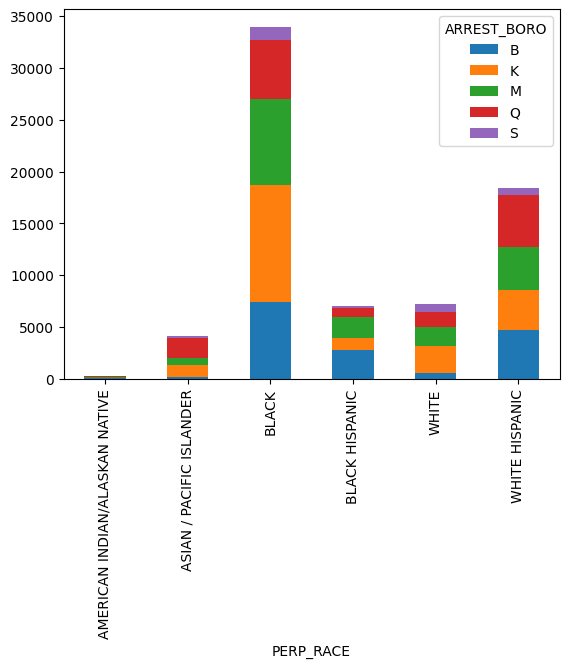

In [120]:
#Arrest Counts Grouped by Borough and race
#B(Bronx), S(Staten Island), K(Brooklyn),M(Manhattan), Q(Queens)
arrest_race_geder= arrest_df_dropped.groupby(["PERP_RACE", "ARREST_BORO"])["ARREST_KEY"].count().unstack()
arrest_race_geder.plot(kind="bar", stacked=True);

<ipython-input-130-a5e8b0b676a3>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, ha="right", fontsize=8)


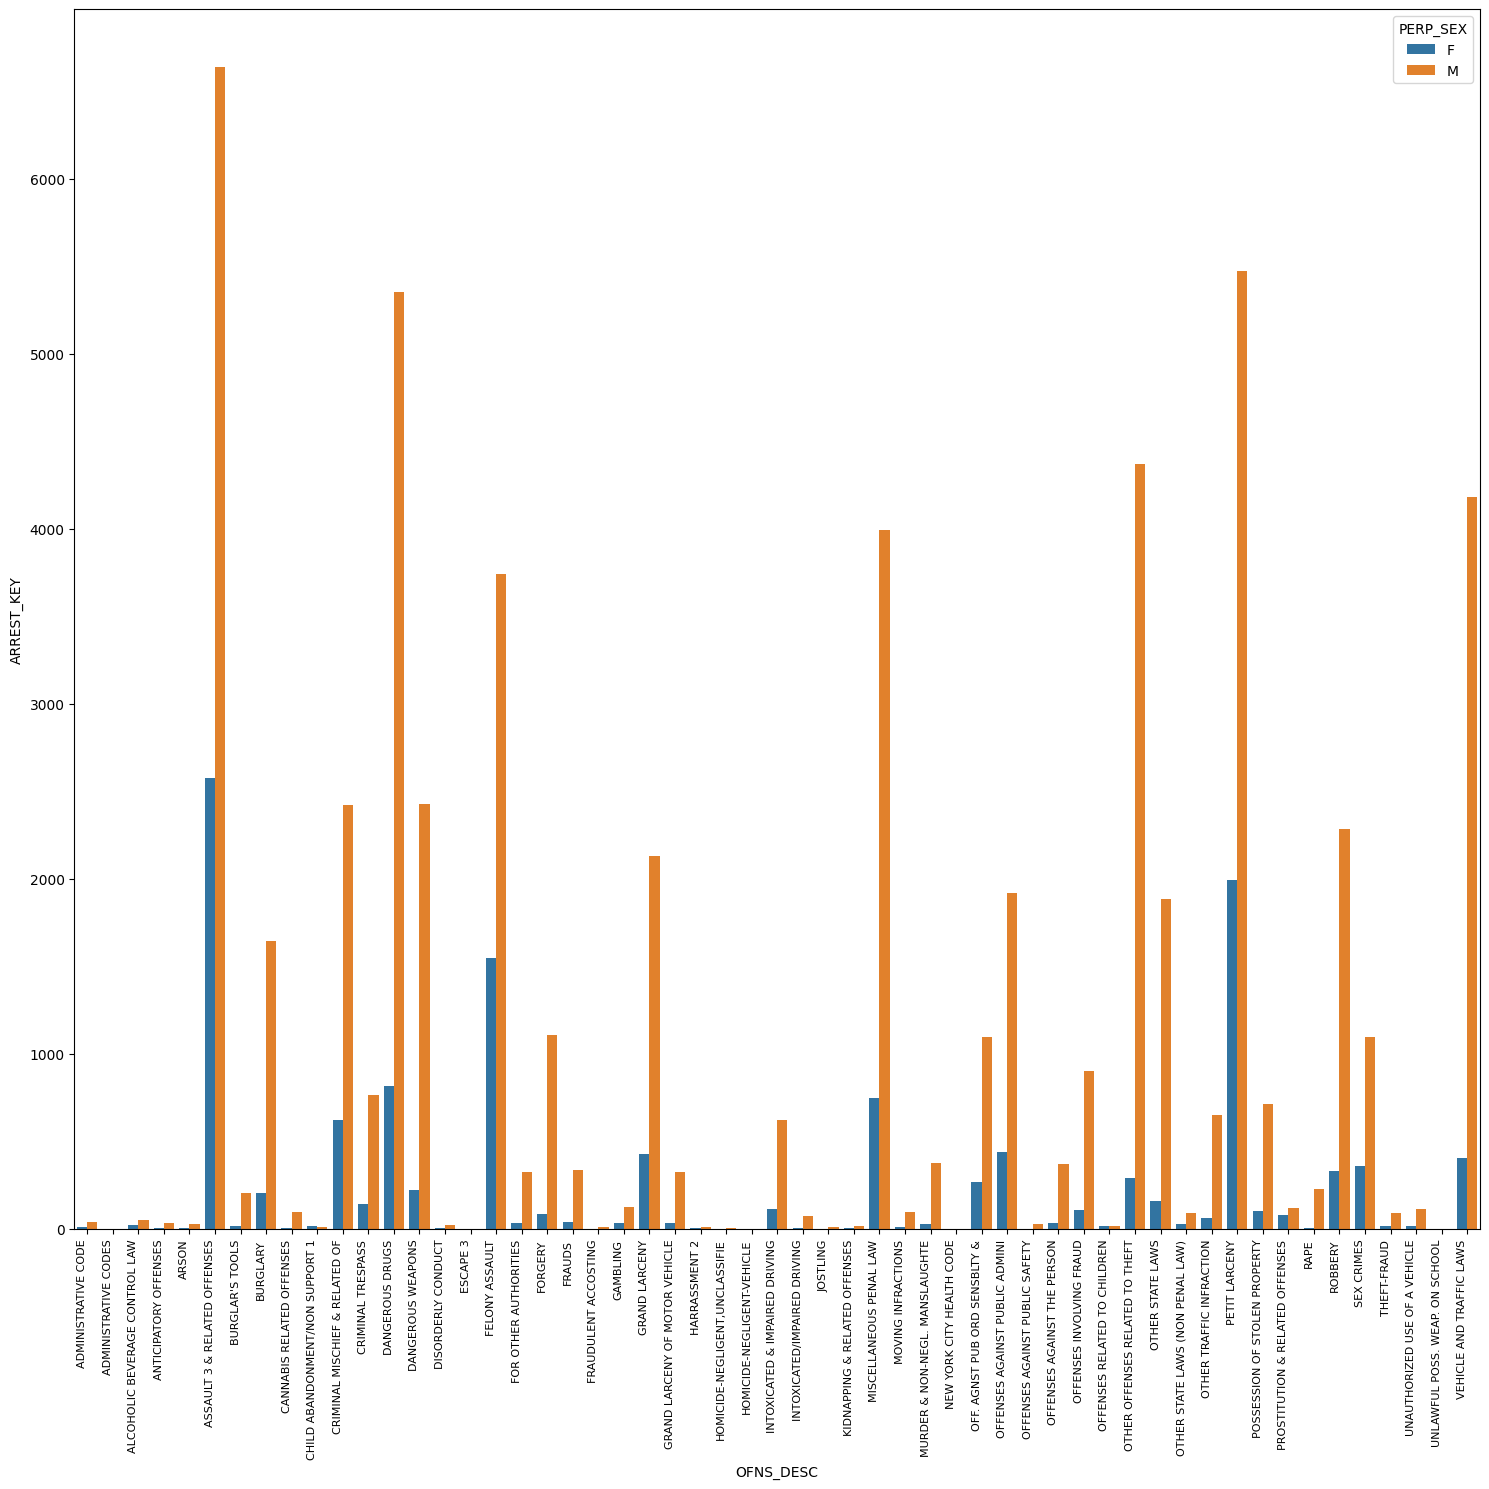

In [130]:
plt.figure(figsize=(15, 15))
barplot = sns.barplot(data=arrest_df_dropped.groupby([ "OFNS_DESC", "PERP_SEX" ])["ARREST_KEY"].count().reset_index(), x="OFNS_DESC", y= "ARREST_KEY", hue="PERP_SEX")
#The plot was not clear, which is why I added this visualization solution:
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, ha="right", fontsize=8)
plt.tight_layout()
plt.show();

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    1799
DANGEROUS DRUGS                 1724
RAPE                              33
VEHICLE AND TRAFFIC LAWS         587
Name: ARREST_KEY, dtype: int64


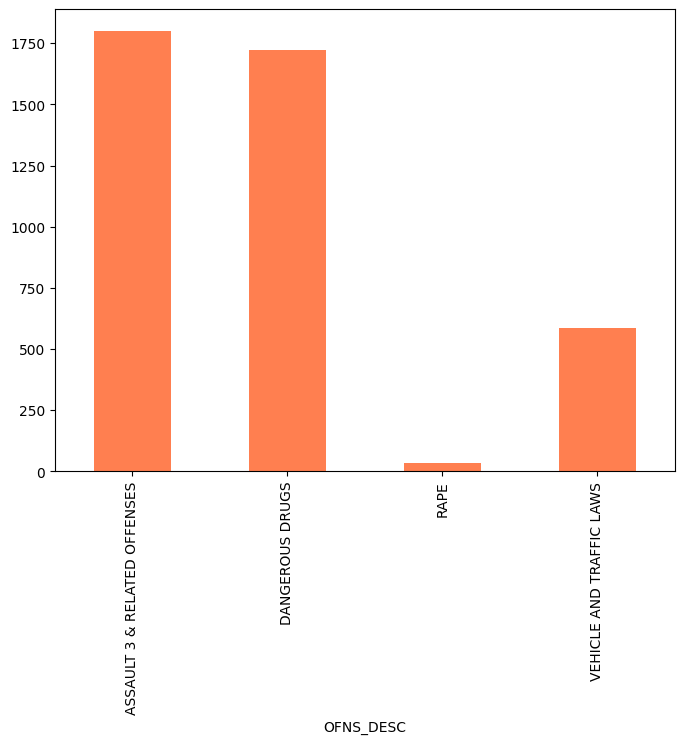

In [148]:
#Arrest Counts for Selected Offenses in Manhattan (M)

filtered_df = arrest_df_dropped[
    (arrest_df_dropped["ARREST_BORO"] == "M") &
    (arrest_df_dropped["OFNS_DESC"].isin(["ASSAULT 3 & RELATED OFFENSES","DANGEROUS DRUGS", "RAPE","VEHICLE AND TRAFFIC LAWS" ]))
]
offense_counts = filtered_df.groupby(["OFNS_DESC"])["ARREST_KEY"].count()
offense_counts.plot(kind="bar", color="coral", figsize=(8, 6))
print(offense_counts)


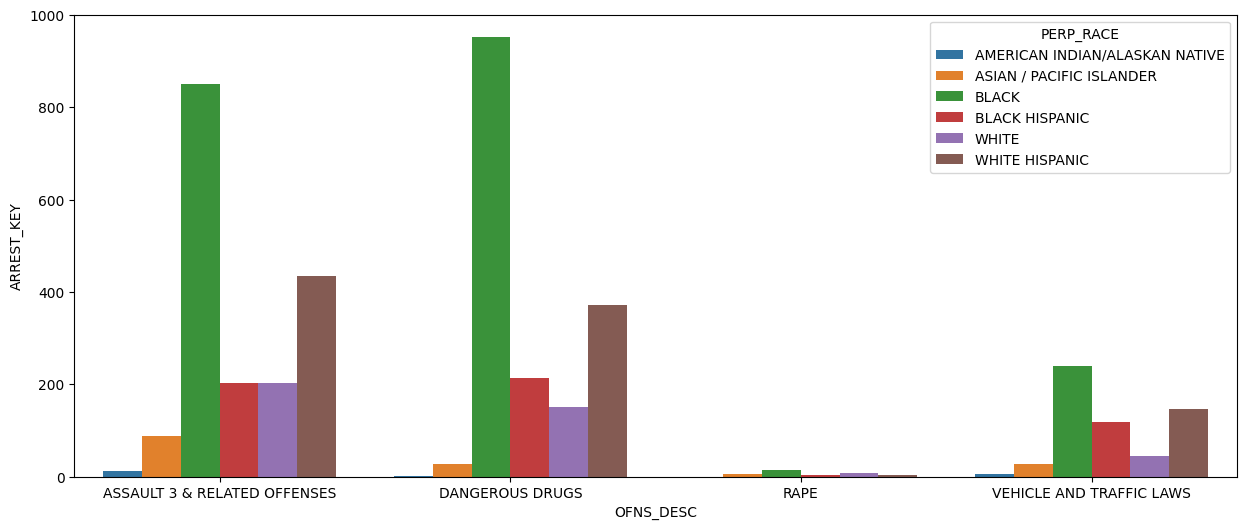

In [143]:
#Arrest Counts for Selected Offenses in Manhattan (M) by race
plt.figure(figsize=(15, 6))
sns.barplot(data=filtered_df.groupby(["OFNS_DESC", "PERP_RACE"])["ARREST_KEY"].count().reset_index(), x="OFNS_DESC", y= "ARREST_KEY", hue="PERP_RACE")
plt.show()

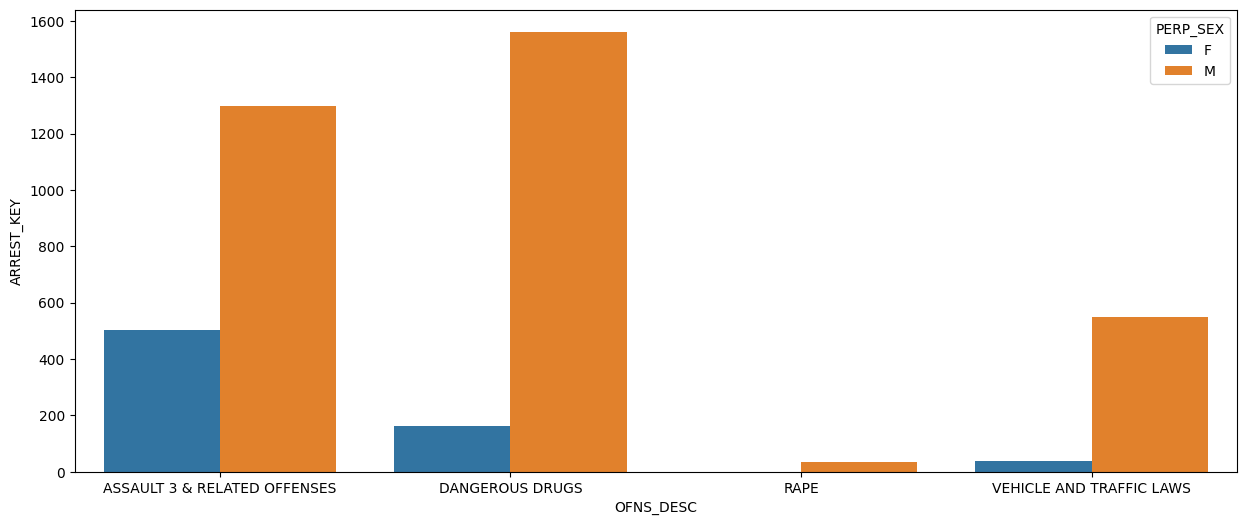

In [144]:
#Arrest Counts for Selected Offenses in Manhattan (M) by gender
plt.figure(figsize=(15, 6))
sns.barplot(data=filtered_df.groupby(["OFNS_DESC", "PERP_SEX"])["ARREST_KEY"].count().reset_index(), x="OFNS_DESC", y= "ARREST_KEY", hue="PERP_SEX")
plt.show()

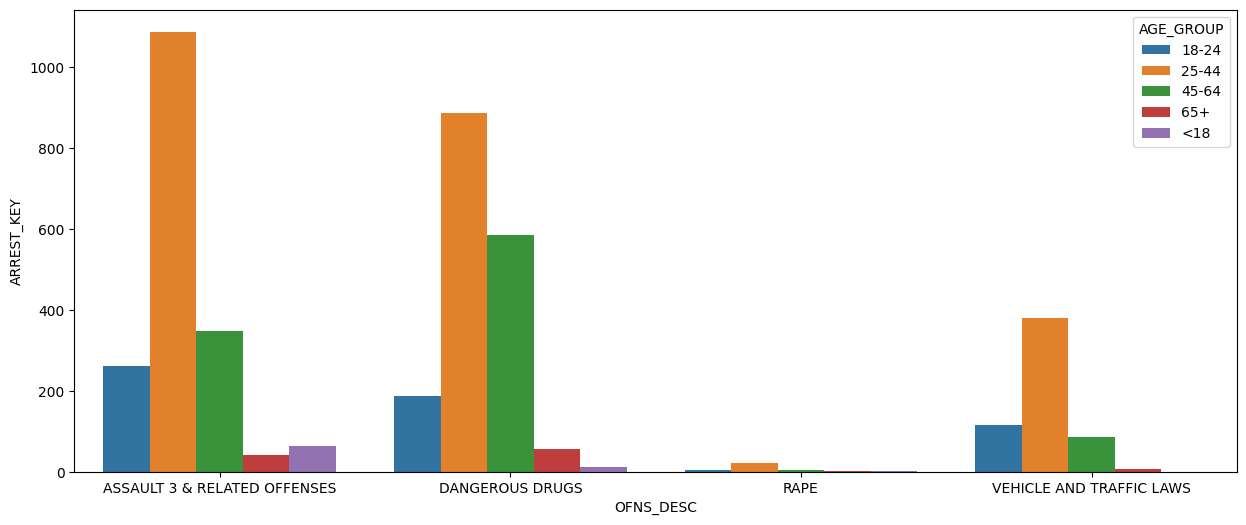

In [145]:
##Arrest Counts for Selected Offenses in Manhattan (M) by age
plt.figure(figsize=(15, 6))
sns.barplot(data=filtered_df.groupby(["OFNS_DESC", "AGE_GROUP"])["ARREST_KEY"].count().reset_index(), x="OFNS_DESC", y= "ARREST_KEY", hue="AGE_GROUP")
plt.show()

OFNS_DESC    ASSAULT 3 & RELATED OFFENSES  DANGEROUS DRUGS  RAPE  \
ARREST_BORO                                                        
B                                    2345             1416    83   
K                                    2563             1710    61   
M                                    1799             1724    33   
Q                                    2121             1035    47   
S                                     383              282     8   

OFNS_DESC    VEHICLE AND TRAFFIC LAWS  
ARREST_BORO                            
B                                1072  
K                                1408  
M                                 587  
Q                                1239  
S                                 280  


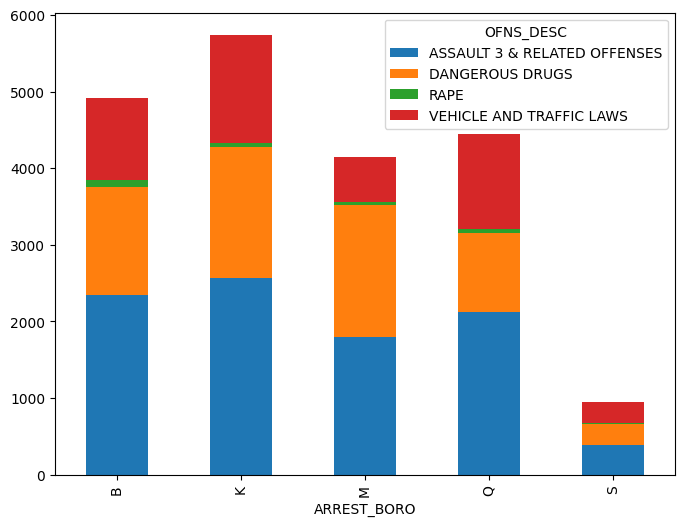

In [157]:
#Selected offense counts by Boroughs B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
filtered_df_boro = arrest_df_dropped[
    (arrest_df_dropped["OFNS_DESC"].isin(["ASSAULT 3 & RELATED OFFENSES","DANGEROUS DRUGS", "RAPE","VEHICLE AND TRAFFIC LAWS" ]))
]
offense_counts_boro = filtered_df_boro.groupby(["ARREST_BORO", "OFNS_DESC"])["ARREST_KEY"].count().unstack()
offense_counts_boro.plot(kind="bar", figsize=(8, 6), stacked=True)
print(offense_counts_boro)

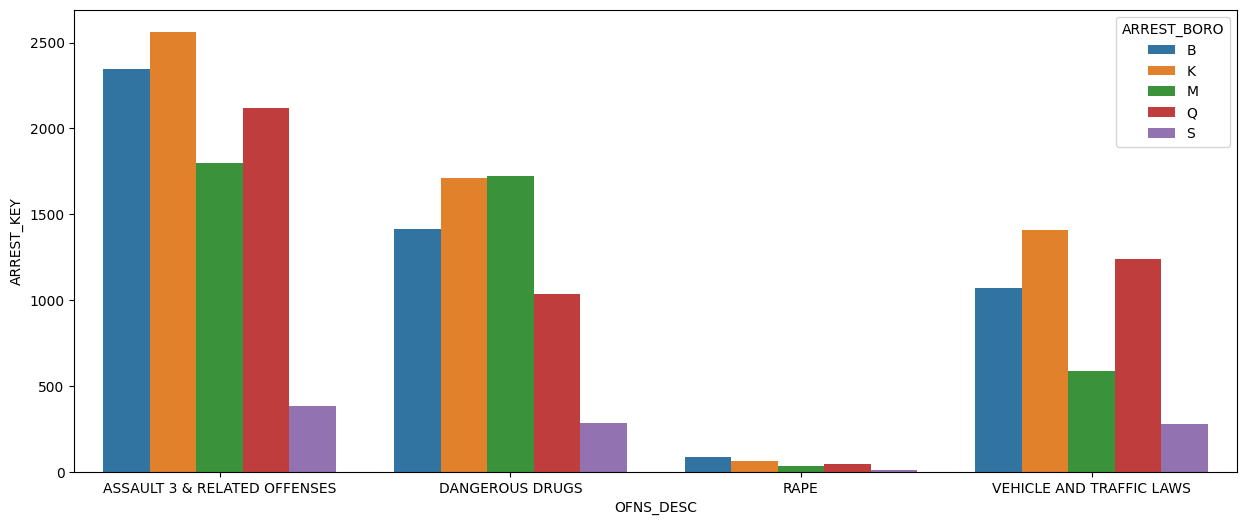

In [150]:
#Arrest Counts for Selected Offenses in B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens) by race
plt.figure(figsize=(15, 6))
sns.barplot(data=filtered_df_boro.groupby(["OFNS_DESC", "ARREST_BORO"])["ARREST_KEY"].count().reset_index(), x="OFNS_DESC", y= "ARREST_KEY", hue="ARREST_BORO")
plt.show()

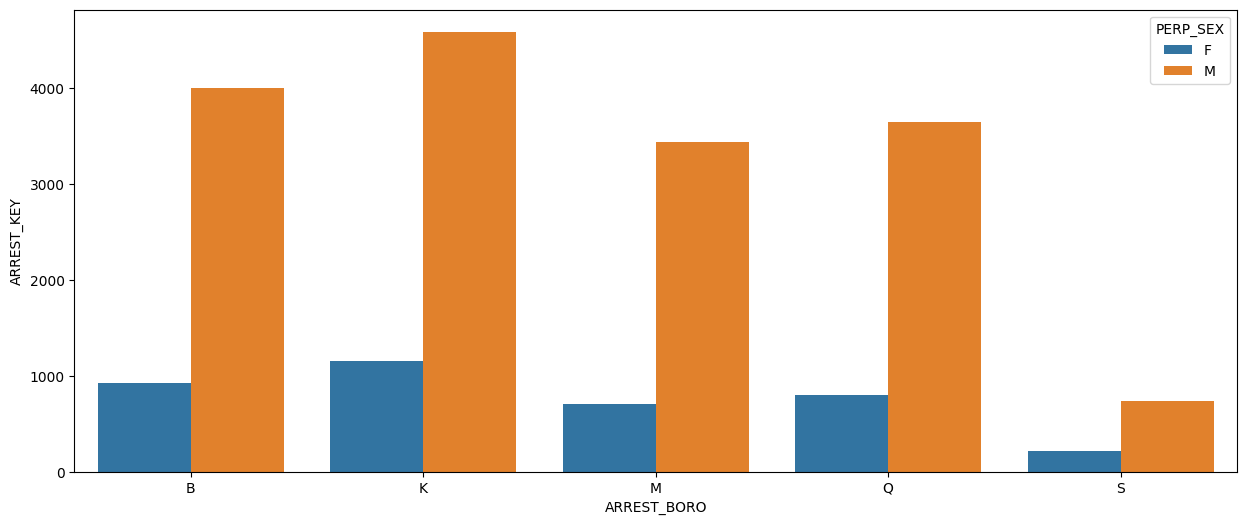

In [152]:
#Arrest Counts by gender Group Across NYC Boroughs B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
plt.figure(figsize=(15, 6))
sns.barplot(data=filtered_df_boro.groupby(["PERP_SEX", "ARREST_BORO"])["ARREST_KEY"].count().reset_index(), x="ARREST_BORO", y= "ARREST_KEY", hue="PERP_SEX")
plt.show()

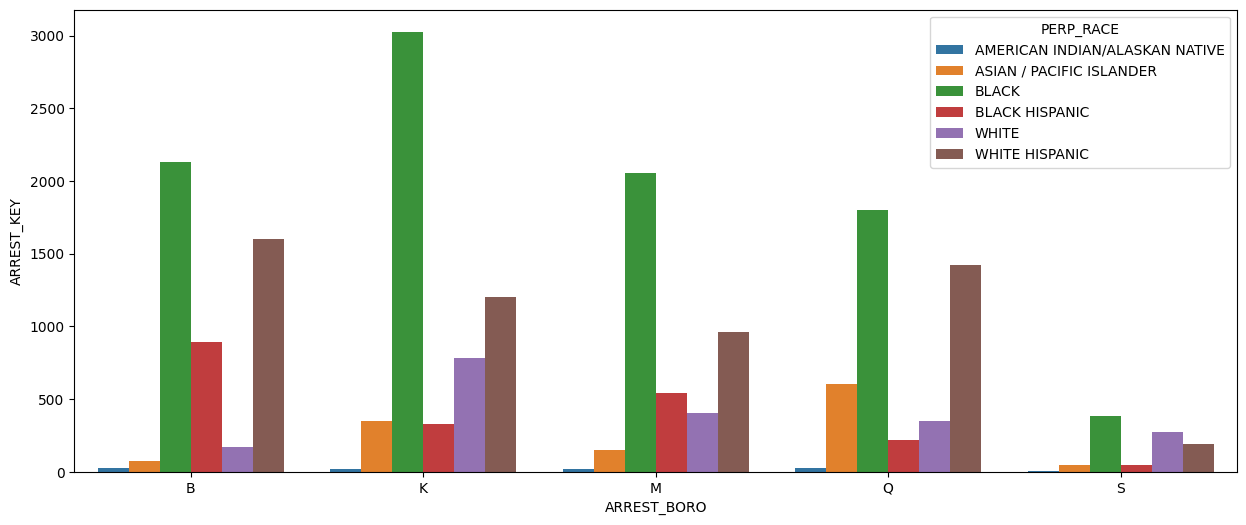

In [155]:
#Arrest Counts by race Group Across NYC Boroughs B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
plt.figure(figsize=(15, 6))
sns.barplot(data=filtered_df_boro.groupby(["PERP_RACE", "ARREST_BORO"])["ARREST_KEY"].count().reset_index(), x="ARREST_BORO", y= "ARREST_KEY", hue="PERP_RACE")
plt.show()

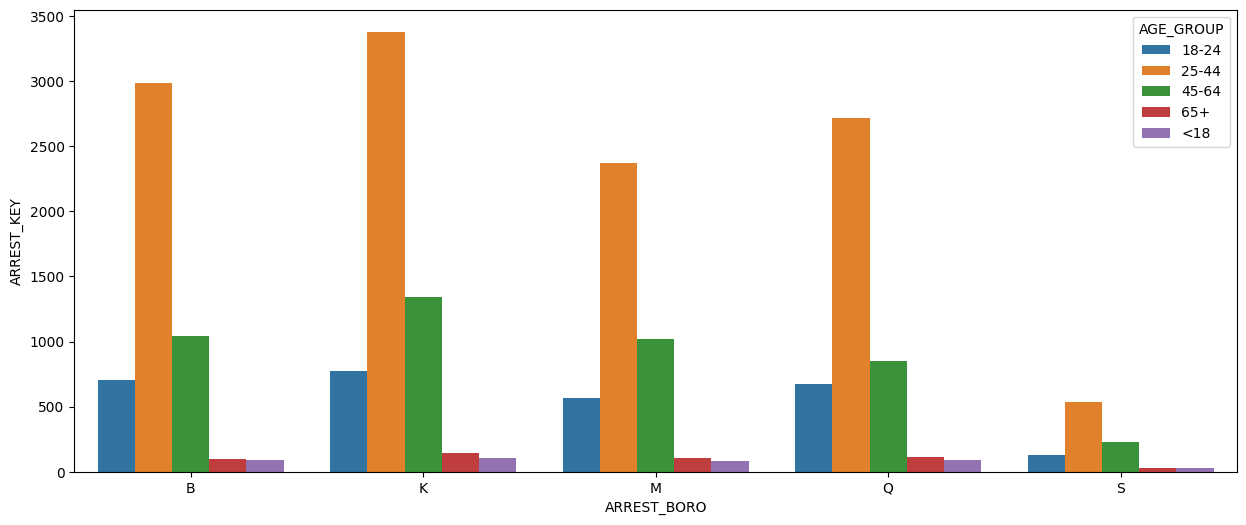

In [154]:
#Arrest Counts by Age Group Across NYC Boroughs B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
plt.figure(figsize=(15, 6))
sns.barplot(data=filtered_df_boro.groupby(["AGE_GROUP", "ARREST_BORO"])["ARREST_KEY"].count().reset_index(), x="ARREST_BORO", y= "ARREST_KEY", hue="AGE_GROUP")
plt.show()

##Conclusion Statement

1. My visualizations analyzed NYPD arrest data, focusing on demographics such as race, age, and gender, as well as offense types across the boroughs of New York City.

2. The visualizations revealed that the majority of those arrested are males in the 25-44 age group. The highest number of arrests were recorded among African American and White-Hispanic individuals, while the lowest number of arrests occurred among American Indian/Alaskan Native and Asian/Pacific Islander groups.

3. Assault 3 & Related Offenses were the most frequently recorded arrest categories.

4. For the visualization, the following offenses were selected: Assault 3 & Related Offenses, dangerous drugs, rape, and vehicle and traffic laws. The analysis indicates that Brooklyn has the highest number of arrests, followed by the Bronx, Queens, Manhattan, and Staten Island.